In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from  sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Social_net.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [4]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data["Gender"])

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [7]:
data.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


In [8]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null int32
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int32(1), int64(4)
memory usage: 14.1 KB


In [10]:
data.skew()

User ID           -0.034513
Gender             0.040159
Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

# VISUALIZATION

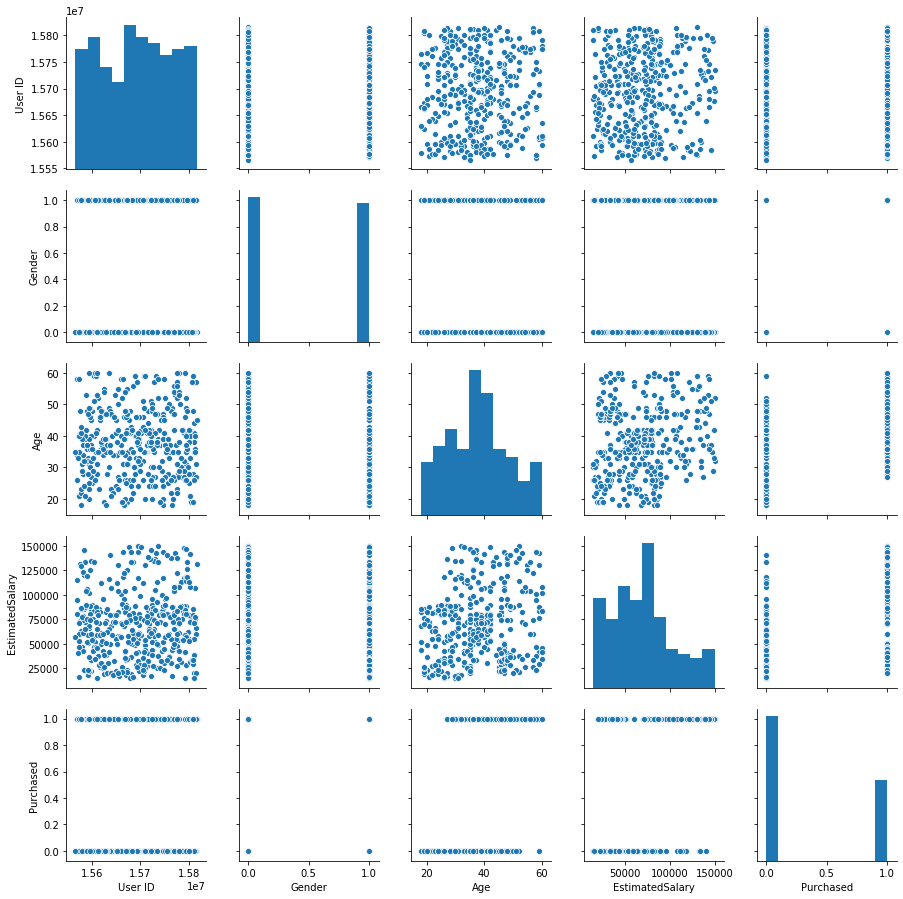

In [11]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E951EC05F8>,
      dtype=object)

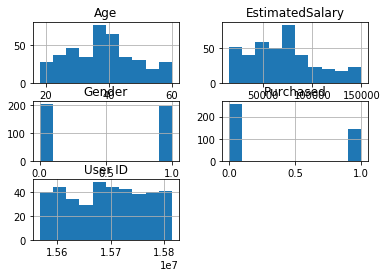

In [12]:
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9523FCA90>,
      dtype=object)

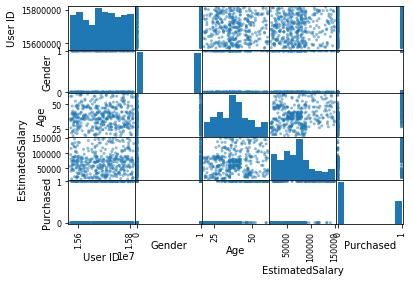

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)

In [14]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

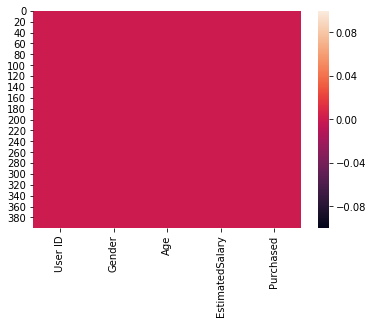

In [15]:
sns.heatmap(data.isnull())

In [16]:
data.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


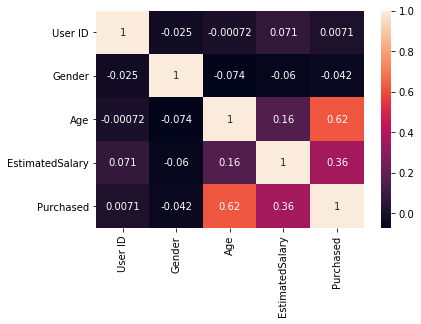

In [17]:
sns.heatmap(data.corr(),annot=True)

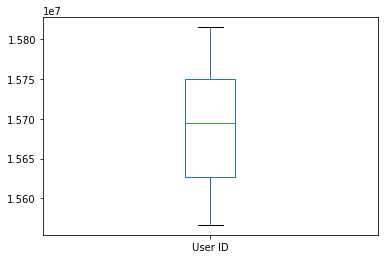

In [18]:
#checking the outliers
data['User ID'].plot.box()

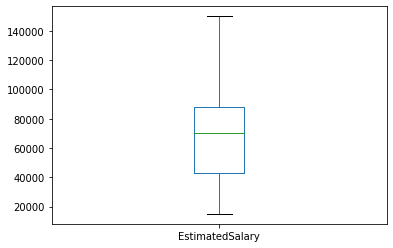

In [19]:
data['EstimatedSalary'].plot.box()

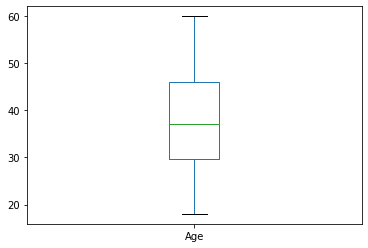

In [20]:
data['Age'].plot.box()


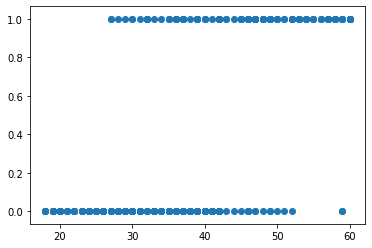

In [21]:
plt.scatter(data['Age'],data['Purchased'])

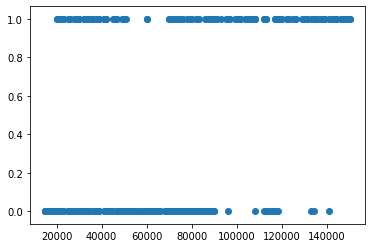

In [22]:
plt.scatter(data['EstimatedSalary'],data['Purchased'])

# SPLITTING DATA INTO X AND Y FOR TRAINING AND TESTING

In [23]:
x=data.drop("Purchased",axis=1)
x.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000


In [24]:
#
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)

In [25]:
y=data['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=42)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 4)
(84, 4)
(316,)
(84,)


# Applying Model and Algorithms using cross validation score

In [28]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')

print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(sv,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy Score= [0.66666667 0.95061728 0.9125     0.81012658 0.75949367]
Mean Scores 0.8198808407563682
Standard Deviation 0.10284616203190733
Y Prediction values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


0.82

In [29]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')

print('F1-Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

F1-Score= [0.67857143 0.87612574 0.82905983 0.76363032 0.80200501]
Mean Scores 0.7898784665453971
Standard Deviation 0.06663189476192741
Y Prediction values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1
 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1]


0.8125

In [30]:
lg=LogisticRegression()
score=cross_val_score(lg,x,y,cv=5,scoring='f1_macro')

print('F1-Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(lg,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

F1-Score= [0.48625793 0.91503497 0.91452991 0.78503401 0.71896649]
Mean Scores 0.7639646613931108
Standard Deviation 0.15816568225828673
Y Prediction values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]


0.815

In [33]:
rfc=RandomForestClassifier()
score=cross_val_score(rfc,x,y,cv=5,scoring='f1_macro')

print('F1-Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(rfc,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

F1-Score= [0.71918336 0.94541779 0.87303826 0.82840434 0.84905333]
Mean Scores 0.8430194168413309
Standard Deviation 0.0734464916018856
Y Prediction values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0
 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0
 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1
 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1]


0.8625

In [35]:
from sklearn.externals import joblib
joblib.dump(rfc,'Project13.pkl')

['Project13.pkl']